# Melbourne Housing Market

Dataset referente ao mercado imobiliario de Melbourne.(preciso melhorar a descrição)


Dataset encontra-se disponivel no endereço: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [1054]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [1055]:
df = pd.read_csv(r"C:\Users\dougl\OneDrive\Área de Trabalho\Projetos GitHub\Melbourne_house\archive\Melbourne_housing_FULL.csv")

In [1056]:
pd.set_option('display.max_columns',None)

In [1057]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [1058]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5604,Ivanhoe,16 Ayton St,3,h,950000.0,VB,Miles,19/11/2016,7.9,3079.0,3.0,3.0,2.0,290.0,NaN,NaN,Banyule City Council,-37.76010,145.03630,Eastern Metropolitan,5549.0
24374,Essendon,17 Balmoral St,4,h,1900000.0,VB,McDonald,14/10/2017,7.5,3040.0,4.0,2.0,6.0,936.0,NaN,NaN,Moonee Valley City Council,-37.74901,144.90629,Western Metropolitan,9264.0
29982,Williams Landing,6 Wildebrand Av,4,h,785000.0,S,hockingstuart,6/01/2018,17.6,3027.0,4.0,2.0,2.0,448.0,248.0,2013.0,Wyndham City Council,-37.85737,144.74870,Western Metropolitan,1999.0
16822,Coburg North,10 Arthur St,3,h,865000.0,S,Ray,27/05/2017,6.7,3058.0,3.0,2.0,2.0,677.0,110.0,1960.0,Darebin City Council,-37.72361,144.98370,Northern Metropolitan,3445.0
21676,Balwyn North,11 Minerva Av,5,h,2600000.0,VB,Jellis,19/08/2017,9.7,3104.0,5.0,4.0,2.0,708.0,NaN,NaN,Boroondara City Council,-37.78787,145.08468,Southern Metropolitan,7809.0


In [1059]:
df.tail(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,2.0,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [1060]:
df.shape

(34857, 21)

In [1061]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [1062]:
#Corrigindo o nome da coluna:
df.rename(columns={'Bedroom2': 'Bedroom'}, inplace = True)

In [1063]:
#removendo a abreviação
df['Type'].replace('h','House', inplace=True)
df['Type'].replace('t','Townhouse', inplace=True)
df['Type'].replace('u','Unit', inplace=True)

***

Localizando e tratando as duplicidades:

In [1064]:
df.duplicated().value_counts()

False    34856
True         1
dtype: int64

In [1065]:
df = df.drop_duplicates()

In [1066]:
df.duplicated().value_counts()

False    34856
dtype: int64

***

Visualização e tratamento de Outliers

In [1067]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34856.000000,2.724700e+04,34855.000000,34855.000000,26639.000000,26630.000000,26128.000000,23046.000000,13741.000000,15550.000000,26880.000000,26880.000000,34853.000000
mean,3.031013,1.050173e+06,11.184808,3116.062430,3.084650,1.624747,1.728835,593.607177,160.251616,1965.287653,-37.810634,145.001845,7572.962901
std,0.969947,6.414671e+05,6.788952,109.025437,0.980708,0.724177,1.010789,3398.915462,401.281270,37.328340,0.090281,0.120167,4428.131940
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754092,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


In [1068]:
df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

Rooms                 3.0000
Price            870000.0000
Distance             10.3000
Postcode           3103.0000
Bedroom               3.0000
Bathroom              2.0000
Car                   2.0000
Landsize            521.0000
BuildingArea        136.0000
YearBuilt          1970.0000
Lattitude           -37.8076
Longtitude          145.0078
Propertycount      6763.0000
Name: 0.5, dtype: float64

<AxesSubplot: >

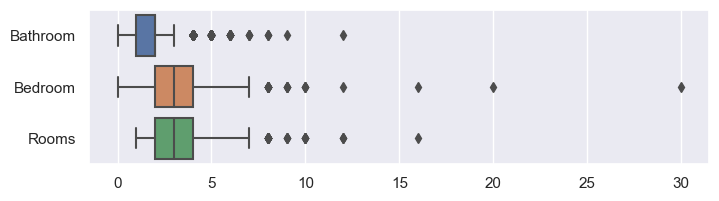

In [1069]:
sns.set(rc={"figure.figsize":(8, 2)})
sns.boxplot(data=df[["Bathroom", "Bedroom","Rooms"]], orient="h")

melhorar a descricao


Conforme visualizado nos Boxplot acima, existe outliers para serem eleminados

In [1070]:
df.drop(df.loc[df['Bathroom']>=4].index, inplace=True)
df.drop(df.loc[df['Bedroom']>=8].index, inplace=True)
df.drop(df.loc[df['Bedroom']<1].index, inplace=True)
df.drop(df.loc[df['Rooms']>=8].index, inplace=True)
df.drop(df.loc[df['Bathroom']<1].index, inplace=True)

<AxesSubplot: >

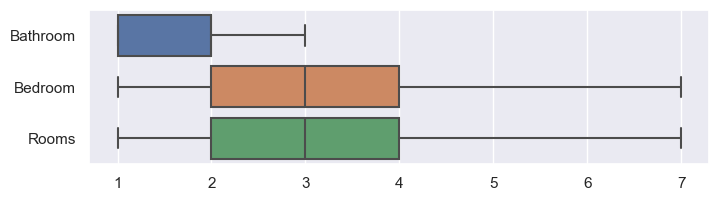

In [1071]:
sns.set(rc={"figure.figsize":(8, 2)})
sns.boxplot(data=df[["Bathroom", "Bedroom","Rooms"]], orient="h")

<AxesSubplot: xlabel='Landsize'>

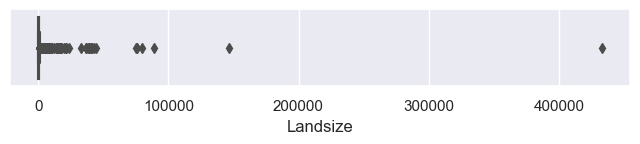

In [1072]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['Landsize'])

In [1073]:
df.drop(df.loc[df['Landsize']>=1300].index, inplace=True)

<AxesSubplot: xlabel='Landsize'>

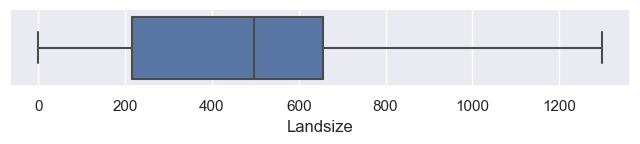

In [1074]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['Landsize'])

<AxesSubplot: xlabel='BuildingArea'>

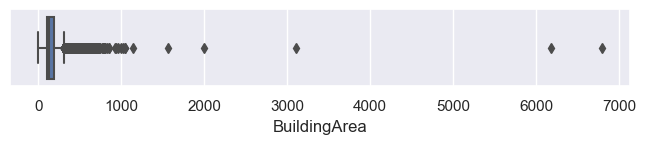

In [1075]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['BuildingArea'])

In [1076]:
df.drop(df.loc[df['BuildingArea']>=300].index, inplace=True)

<AxesSubplot: xlabel='BuildingArea'>

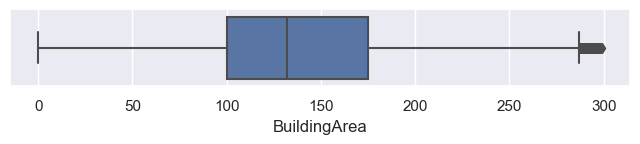

In [1077]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['BuildingArea'])

******************************

Verificando e tratando valores nulos:

In [1078]:
df.isnull().sum().sort_values(ascending=False)

BuildingArea     20590
YearBuilt        18811
Landsize         11674
Car               8696
Bathroom          8216
Bedroom           8207
Longtitude        7969
Lattitude         7969
Price             7118
Regionname           3
CouncilArea          3
Propertycount        3
Postcode             1
Distance             1
Address              0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Suburb               0
dtype: int64

É possivel visualizar acima, os dados que apresentão algum tipo de campo nulo. será iniciado o tratamento apartir destes dados.

Primeiro passo sera o preenchimento dos campos vazios referente ao tamanho da casa/área comstruida(BuildingArea), com base na mediana das casas com o mesmo numero de comodos(Rooms)até onde apresenta 7 comodos.
Para melhor obtebçao destes dados sera utilizado um dataset temporario onde sera deletados todos os campos com erro.

In [1079]:
df_limpo_temporario = df.dropna()
print(df_limpo_temporario.isnull().sum().sort_values())

Suburb           0
Longtitude       0
Lattitude        0
CouncilArea      0
YearBuilt        0
BuildingArea     0
Landsize         0
Car              0
Bathroom         0
Regionname       0
Bedroom          0
Distance         0
Date             0
SellerG          0
Method           0
Price            0
Type             0
Rooms            0
Address          0
Postcode         0
Propertycount    0
dtype: int64


In [1080]:
df_limpo_temporario.groupby("Rooms").agg({"BuildingArea":['min','mean', 'median','max']})

BuildingArea                           
               min        mean median     max
Rooms                                        
1              1.0   52.283619   49.0  207.00
2              0.0   88.334588   85.0  296.00
3              0.0  133.458584  129.0  292.00
4              0.0  186.265131  184.0  298.21
5              0.0  217.870987  223.5  297.00
6            113.0  227.833333  224.5  295.00
7            287.0  287.000000  287.0  287.00

In [1081]:
df.loc[df['Rooms'] == 1, 'BuildingArea'] = df.loc[df['Rooms'] == 1, 'BuildingArea'].fillna(50)
df.loc[df['Rooms'] == 2, 'BuildingArea'] = df.loc[df['Rooms'] == 2, 'BuildingArea'].fillna(85)
df.loc[df['Rooms'] == 3, 'BuildingArea'] = df.loc[df['Rooms'] == 3, 'BuildingArea'].fillna(130)
df.loc[df['Rooms'] == 4, 'BuildingArea'] = df.loc[df['Rooms'] == 4, 'BuildingArea'].fillna(188)
df.loc[df['Rooms'] == 5, 'BuildingArea'] = df.loc[df['Rooms'] == 5, 'BuildingArea'].fillna(242)
df.loc[df['Rooms'] == 6, 'BuildingArea'] = df.loc[df['Rooms'] == 6, 'BuildingArea'].fillna(288)
df.loc[df['Rooms'] == 7, 'BuildingArea'] = df.loc[df['Rooms'] == 7, 'BuildingArea'].fillna(355)

Agora sera preenchido os campos vazios referente ao preço(Price), com base na mediana das casas com o mesmo numero de comodos(Rooms),até onde apresenta 7 comodos. 
Para melhor obtebçao destes dados res utilizado um dataset temporario onde sera deletados todos os campos com erro.

In [1082]:
df_limpo_temporario = df.dropna()
df_limpo_temporario.groupby("Rooms").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1        85000.0  4.160252e+05   380000.0  1820000.0
2       240000.0  7.482085e+05   675000.0  3625000.0
3       283000.0  1.034107e+06   905000.0  9000000.0
4       131000.0  1.317819e+06  1187000.0  6370000.0
5       355000.0  1.553108e+06  1410000.0  4802500.0
6       506000.0  1.554069e+06  1650000.0  3000000.0
7      1005000.0  1.105000e+06  1105000.0  1205000.0

In [1083]:
df.loc[df['Rooms'] == 1, 'Price'] = df.loc[df['Rooms'] == 1, 'Price'].fillna(380000)
df.loc[df['Rooms'] == 2, 'Price'] = df.loc[df['Rooms'] == 2, 'Price'].fillna(670000)
df.loc[df['Rooms'] == 3, 'Price'] = df.loc[df['Rooms'] == 3, 'Price'].fillna(900000)
df.loc[df['Rooms'] == 4, 'Price'] = df.loc[df['Rooms'] == 4, 'Price'].fillna(1209500)
df.loc[df['Rooms'] == 5, 'Price'] = df.loc[df['Rooms'] == 5, 'Price'].fillna(1550000)
df.loc[df['Rooms'] == 6, 'Price'] = df.loc[df['Rooms'] == 6, 'Price'].fillna(1620500)
df.loc[df['Rooms'] == 7, 'Price'] = df.loc[df['Rooms'] == 7, 'Price'].fillna(2000000)

Para o campo Car(Garagem), será atribuido valor zero(0) para todos os valores nulos, porem,  para tornar mais utilizavel, sera criada uma nova coluna com dados booleanos, com o nome "Garage", onde sera considerado verdadeiro para 1, e falso para 0.

In [1084]:
df['Car'].fillna(0, inplace=True)

In [1085]:
df['Garage'] = df['Car'].map(lambda x:0 if x ==0 else 1)

para o campo referente ao tamanho do terreno/propriedade(Landsize), sera utilizado a mediana referernte, de acordo com a regiao onde o imovel se encontra. Para melhor obtebçao destes dados res utilizado um dataset temporario onde sera deletados todos os campos com erro.

In [1086]:
df_limpo_temporario = df.dropna()
df_limpo_temporario.groupby("Regionname").agg({"Landsize":['min','mean', 'median','max','std',]})

Landsize                                       
                                min        mean median     max         std
Regionname                                                                
Eastern Metropolitan            0.0  593.544944  652.0  1267.0  252.072683
Eastern Victoria              196.0  762.179104  796.0  1254.0  228.227155
Northern Metropolitan           0.0  353.936482  326.0  1262.0  251.149468
Northern Victoria             151.0  679.173913  679.0  1290.0  224.320605
South-Eastern Metropolitan      0.0  577.441121  602.0  1200.0  194.935646
Southern Metropolitan           0.0  383.998335  338.0  1298.0  302.410754
Western Metropolitan            0.0  423.625426  446.0  1218.0  236.916620
Western Victoria              180.0  642.870370  602.0  1241.0  152.287098

In [1087]:
df.loc[df['Regionname'] == 'Eastern Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Eastern Victoria', 'Landsize'].fillna(756)
df.loc[df['Regionname'] == 'Northern Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Northern Victoria', 'Landsize'].fillna(681)
df.loc[df['Regionname'] == 'Western Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Western Victoria', 'Landsize'].fillna(616)


In [1088]:
#somente para consulta, apagar apos termino
df.isnull().sum().sort_values(ascending=False)

YearBuilt        18811
Landsize         11493
Bathroom          8216
Bedroom           8207
Longtitude        7969
Lattitude         7969
Propertycount        3
Regionname           3
CouncilArea          3
Distance             1
Postcode             1
BuildingArea         0
Suburb               0
Car                  0
Address              0
Date                 0
SellerG              0
Method               0
Price                0
Type                 0
Rooms                0
Garage               0
dtype: int64

A R R U M A R   E S T A   D E S C R I Ç A O 
Para os demais valores nulos, com exceçao da coluna (YearBuilt), sera deletado, pois o preenchimento destes pode não condizer com uma previsao correta. 

In [1089]:
df = df.dropna(subset=["Landsize"])
df = df.dropna(subset=["Bathroom"])
df = df.dropna(subset=["Longtitude"])
df = df.dropna(subset=["Lattitude"])


In [1090]:
#somente para consulta, apagar apos termino
df.isnull().sum().sort_values(ascending=False)

YearBuilt        8879
Suburb              0
Address             0
Propertycount       0
Regionname          0
Longtitude          0
Lattitude           0
CouncilArea         0
BuildingArea        0
Landsize            0
Car                 0
Bathroom            0
Bedroom             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Garage              0
dtype: int64

In [1091]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21559 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21559 non-null  object 
 1   Address        21559 non-null  object 
 2   Rooms          21559 non-null  int64  
 3   Type           21559 non-null  object 
 4   Price          21559 non-null  float64
 5   Method         21559 non-null  object 
 6   SellerG        21559 non-null  object 
 7   Date           21559 non-null  object 
 8   Distance       21559 non-null  float64
 9   Postcode       21559 non-null  float64
 10  Bedroom        21559 non-null  float64
 11  Bathroom       21559 non-null  float64
 12  Car            21559 non-null  float64
 13  Landsize       21559 non-null  float64
 14  BuildingArea   21559 non-null  float64
 15  YearBuilt      12680 non-null  float64
 16  CouncilArea    21559 non-null  object 
 17  Lattitude      21559 non-null  float64
 18  Longti

* * * * * * * * * * * * * * * * * * * * * *

In [1092]:
df.to_csv("Melbourne_Housing_Dataset_Final.csv", index=False)

***

In [1093]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Garage
0,Abbotsford,68 Studley St,2,House,670000.0,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,85.0,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,1
1,Abbotsford,85 Turner St,2,House,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,1
2,Abbotsford,25 Bloomburg St,2,House,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0
3,Abbotsford,18/659 Victoria St,3,Unit,900000.0,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,130.0,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,1
4,Abbotsford,5 Charles St,3,House,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,78 Bayview Rd,3,House,1101000.0,S,Jas,24/02/2018,6.3,3013.0,3.0,1.0,0.0,288.0,130.0,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0,0
34852,Yarraville,13 Burns St,4,House,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,188.0,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,1
34853,Yarraville,29A Murray St,2,House,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,1
34854,Yarraville,147A Severn St,2,Townhouse,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,1


Primeira Analise dos dados

<AxesSubplot: ylabel='Type'>

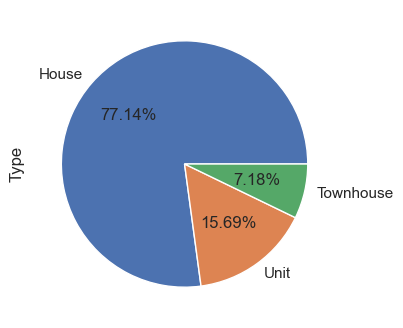

In [1095]:
df["Type"].value_counts().plot(kind="pie", autopct="%.2f%%", figsize=(4,4))

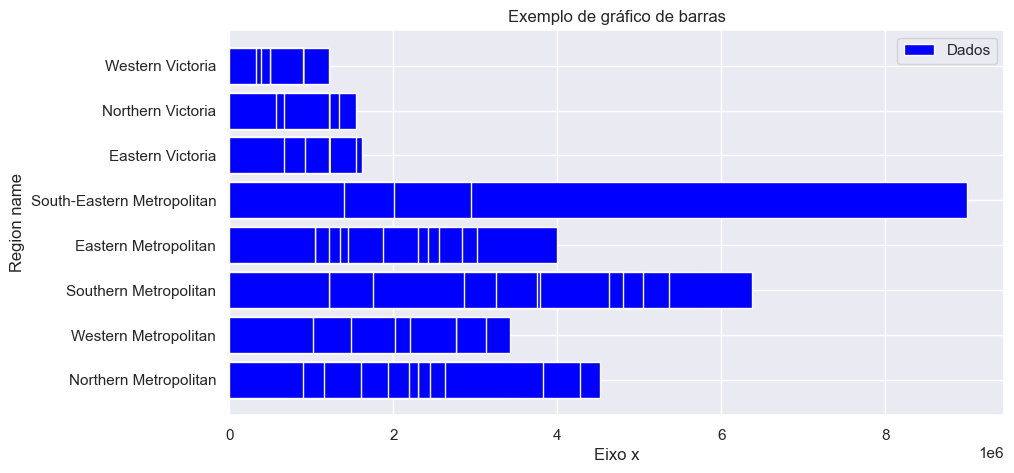

In [1096]:

y = df["Price"]
x = df["Regionname"]


plt.figure(figsize=(10,5))
plt.barh(x, y, color="blue")
plt.title("Exemplo de gráfico de barras")
plt.xlabel("Eixo x")
plt.ylabel("Region name")
plt.legend(["Dados"])
plt.show()


***

Nao fazer alteraçoes abaixo

In [1097]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [1098]:
ols = LinearRegression()

In [1099]:
X = df_limpo_temporario.drop(["Car", "Suburb","Distance","Postcode","Longtitude", "Propertycount","Lattitude", "Address", "Type", "Method", "YearBuilt", "SellerG", "Date", "CouncilArea", "Regionname"], axis=1)

In [1100]:
#X = df(["Rooms", "Bedroom", "Bathroom", "Garage",], axis=1)

In [1101]:
Y = df["Price"]

In [1102]:
X

,Rooms,Price,Bedroom,Bathroom,Landsize,BuildingArea,Garage
2,2,1035000.0,2.0,1.0,156.0,79.0,0
4,3,1465000.0,3.0,2.0,134.0,150.0,0
6,4,1600000.0,3.0,1.0,120.0,142.0,1
7,4,1209500.0,3.0,2.0,400.0,220.0,1
8,2,670000.0,4.0,1.0,201.0,85.0,1
...,...,...,...,...,...,...,...
34849,3,570000.0,3.0,2.0,404.0,158.0,1
34850,3,900000.0,3.0,2.0,268.0,135.0,1
34853,2,888000.0,2.0,2.0,98.0,104.0,1
34854,2,705000.0,2.0,1.0,220.0,120.0,1


In [1103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12617 entries, 2 to 34856
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         12617 non-null  int64  
 1   Price         12617 non-null  float64
 2   Bedroom       12617 non-null  float64
 3   Bathroom      12617 non-null  float64
 4   Landsize      12617 non-null  float64
 5   BuildingArea  12617 non-null  float64
 6   Garage        12617 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 788.6 KB


In [1104]:
Y

0         670000.0
1        1480000.0
2        1035000.0
3         900000.0
4        1465000.0
           ...    
34851    1101000.0
34852    1480000.0
34853     888000.0
34854     705000.0
34856    1020000.0
Name: Price, Length: 21559, dtype: float64

In [1105]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 21559 entries, 0 to 34856
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
21559 non-null  float64
dtypes: float64(1)
memory usage: 336.9 KB


In [1106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.28, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [12617, 21559]

In [ ]:
X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12617, 7), (21559,), (23879, 6), (9287, 6), (23879,), (9287,))

In [ ]:
ols.fit(X,Y)

ValueError: Found input variables with inconsistent numbers of samples: [12617, 21559]

In [ ]:
ols.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [ ]:
ols.coef_

AttributeError: type object 'LinearRegression' has no attribute 'coef_'

In [ ]:
predito = ols.predict(X)
predito

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
mean_absolute_error(Y, predito) 

NameError: name 'predito' is not defined

In [ ]:
mean_squared_error(y, predito)

NameError: name 'y' is not defined

In [ ]:
r2_score(y, predito)

NameError: name 'y' is not defined